In [3]:
import pandas as pd

class UFCDataProcessor:
    def __init__(self, data_path='data/ufc.csv'):
        self.data_path = data_path
        self.df = self.load_data()

    def load_data(self):
        return pd.read_csv(self.data_path)

    def preprocess_data(self):
        # Kolumny, które nie mogą zawierać wartości null
        non_null_columns = ['wins', 'losses', 'draws']

        # Usuń wiersze, w których 'non_null_columns' mają wartość null
        for column in non_null_columns:
            self.df = self.df[self.df[column].notnull()]

        # Zastąp wartości zerowe w kolumnach (spoza 'non_null_columns') średnią wartością obok
        for col in self.df.columns:
            if col not in non_null_columns and col not in ['name', 'surname', 'wins', 'losses', 'draws']:
                # Sprawdź, czy wartości w danej kolumnie są liczbami przed obliczeniem średniej
                if pd.to_numeric(self.df[col], errors='coerce').notnull().all():
                    self.df[col] = pd.to_numeric(self.df[col], errors='coerce').replace({0: self.df[col].mean()})

        # Usuń wiersze, w których dowolna kolumna (spoza 'non_null_columns') ma wartość null
        self.df = self.df.dropna(subset=[col for col in self.df.columns if col not in non_null_columns], how='any')

        # Ustaw 'brak' w przypadku braku wartości w kolumnie 'stance'
        self.df['stance'] = self.df['stance'].fillna('brak')

        # Utwórz kolumnę 'stance_number' i ustaw 0, jeśli 'stance' jest null lub nie ma mapowania
        stance_mapping = {'Orthodox': 1, 'Southpaw': 2, 'Switch': 3, 'Open Stance': 4}
        self.df['stance_number'] = self.df['stance'].map(stance_mapping).fillna(0)

        # Podziel kolumnę 'name' na 'name' i 'surname'
        name_split = self.df['name'].str.split(expand=True)
        self.df['name'] = name_split[0].str.lower()  # Zamień 'name' na małe litery
        self.df['surname'] = name_split[1].str.lower()  # Zamień 'surname' na małe litery

        # Uporządkuj kolumny w odpowiedniej kolejności
        self.df = self.df[['name', 'surname', 'wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm',
                            'stance', 'stance_number', 'date_of_birth', 'significant_strikes_landed_per_minute',
                            'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute',
                            'significant_strike_defence', 'average_takedowns_landed_per_15_minutes',
                            'takedown_accuracy', 'takedown_defense', 'average_submissions_attempted_per_15_minutes']]

        return self.df.reset_index(drop=True)

    def display_processed_data(self):
        # Wyświetlenie df
        display(self.df)


# Utworzenie obiektu klasy UFCDataProcessor
ufc_processor = UFCDataProcessor()

# Wywołanie metody do wczytania danych
# Możesz również umieścić komentarz, aby wyjaśnić, że to jest krok wczytywania danych
data_loaded = ufc_processor.load_data()

# Wywołanie metody do przetworzenia danych
ufc_processor.preprocess_data()

# Wywołanie metody do wyświetlenia przetworzonych danych
ufc_processor.display_processed_data()

,name,surname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,stance_number,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
4,collin,huckbody,8,2,0,190.50,83.91,193.04,Orthodox,1,1994-09-29,2.050000,60.000000,2.730000,42.0,10.230000,100.000000,38.958891,20.400000
22,dione,barbosa,6,2,0,167.64,56.70,167.64,Orthodox,1,1992-05-08,0.870000,50.000000,0.650000,66.0,3.270000,100.000000,38.958891,9.800000
23,zach,reese,6,1,0,193.04,83.91,195.58,Switch,3,1994-03-24,3.930000,66.000000,6.560000,28.0,1.250586,26.299927,38.958891,9.800000
53,john,albert,6,5,0,172.72,61.23,172.72,Orthodox,1,1986-10-13,3.050000,49.000000,2.820000,35.0,1.250586,26.299927,50.000000,6.100000
59,rob,macdonald,5,4,0,190.50,92.99,198.12,Orthodox,1,1978-09-05,1.800000,50.000000,2.040000,46.0,7.190000,80.000000,80.000000,5.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,kyron,bowen,9,5,0,190.50,83.91,185.42,Orthodox,1,1993-12-22,2.730000,57.000000,2.050000,40.0,1.250586,26.299927,38.958891,0.610095
4096,eperaim,ginting,6,1,0,162.56,61.23,162.56,Orthodox,1,1995-11-30,2.437516,35.542447,3.145206,100.0,15.520000,100.000000,38.958891,0.610095
4099,jamelle,jones,7,5,0,182.88,92.99,190.50,Orthodox,1,1988-01-31,1.780000,80.000000,3.110000,65.0,1.250586,26.299927,38.958891,0.610095
4109,matej,penaz,6,1,0,190.50,83.91,210.82,Southpaw,2,1996-10-14,1.280000,33.000000,2.550000,33.0,1.250586,26.299927,38.958891,0.610095


Charakterystyka statystyczna:
              wins       losses        draws    height_cm  weight_in_kg  \
count  1505.000000  1505.000000  1505.000000  1505.000000   1505.000000   
mean     14.716944     5.735548     0.178073   177.703801     73.766738   
std       7.759578     4.079231     0.486709     8.882962     15.406834   
min       1.000000     0.000000     0.000000   152.400000     52.160000   
25%       9.000000     3.000000     0.000000   170.180000     61.230000   
50%      13.000000     5.000000     0.000000   177.800000     70.310000   
75%      18.000000     8.000000     0.000000   185.420000     83.910000   
max      91.000000    26.000000     5.000000   210.820000    120.200000   

       reach_in_cm  stance_number  significant_strikes_landed_per_minute  \
count  1505.000000    1505.000000                            1505.000000   
mean    182.073276       1.350166                               3.490784   
std      10.584361       0.632909                               1.

C:\Users\nowik\AppData\Local\Temp\ipykernel_25132\3653772870.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  multivariate_stats = self.df.corr()


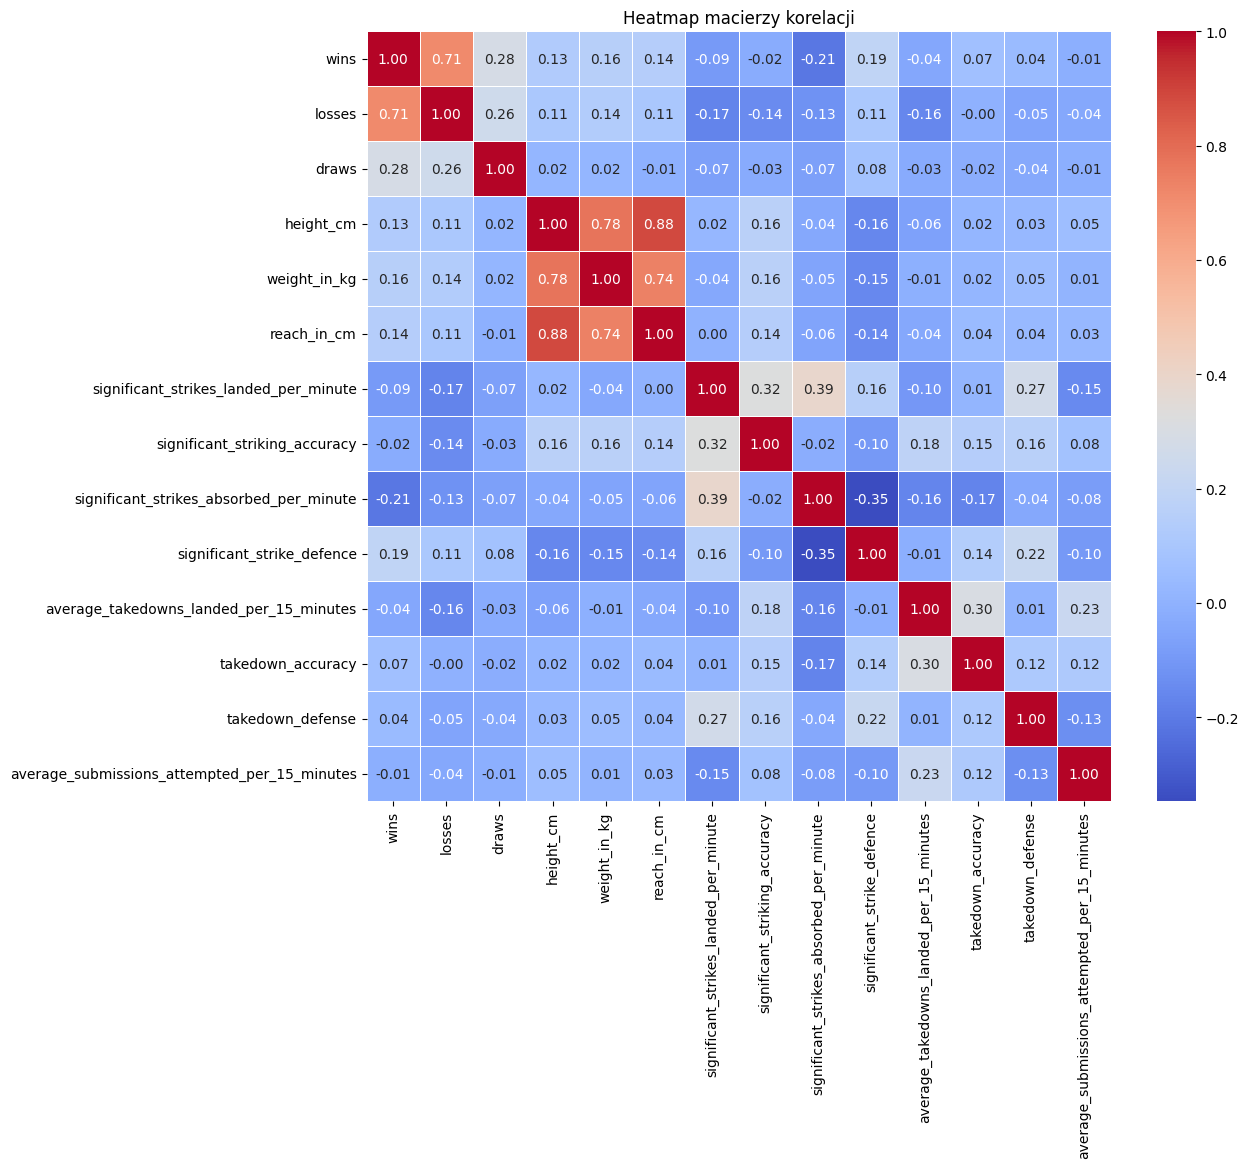

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class UFCDataAnalyzer:
    def __init__(self, processed_df):
        self.df = processed_df

    def descriptive_statistics(self):
        # Charakterystyka statystyczna
        descriptive_stats = self.df.describe()
        print("Charakterystyka statystyczna:")
        print(descriptive_stats)

    def categorical_statistics(self):
        # Statystyki kategoryczne identyfikują częstotliwość wartości i nierównowagi klas
        categorical_stats = self.df['stance'].value_counts()
        print("\nStatystyki kategoryczne (stance):")
        print(categorical_stats)

    def attribute_statistics(self):
        # Statystyki atrybutów
        attribute_stats = self.df[['significant_strikes_landed_per_minute', 'significant_striking_accuracy',
                                   'average_takedowns_landed_per_15_minutes', 'takedown_accuracy']].describe()
        print("\nStatystyki atrybutów:")
        print(attribute_stats)

    def multivariate_statistics(self):
        # Statystyki wielowymiarowe
        multivariate_stats = self.df.corr()
        print("\nStatystyki wielowymiarowe:")
        print(multivariate_stats)

        # Wykluczanie poszczególnych kolumn dla analizy korelacji (date_of_birth,name,surname)
        numerical_columns = ['wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm',
                      'significant_strikes_landed_per_minute', 'significant_striking_accuracy',
                      'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
                      'average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 'takedown_defense',
                      'average_submissions_attempted_per_15_minutes']

        multivariate_stats = self.df[numerical_columns].corr()
        correlation_matrix = self.df[numerical_columns].corr()

        # Heatmap macierzy korelacji
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title("Heatmap macierzy korelacji")
        plt.show()


# Utworzenie obiektu klasy UFCDataAnalyzer, który operuje na przetworzonych danych z obiektu ufc_processor
ufc_analyzer = UFCDataAnalyzer(processed_df=ufc_processor.df)

# Wywołanie metody do analizy charakterystyki statystycznej
ufc_analyzer.descriptive_statistics()

# Wywołanie metody do analizy statystyk kategorycznych
ufc_analyzer.categorical_statistics()

# Wywołanie metody do analizy statystyk atrybutów
ufc_analyzer.attribute_statistics()

# Wywołanie metody do analizy statystyk wielowymiarowych
ufc_analyzer.multivariate_statistics()

In [12]:
 #Importowanie potrzebnych bibliotek
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt


df = ufc_processor.df

# Wybór cech do modelu
features = ['wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm',
            'stance_number', 'significant_strikes_landed_per_minute', 'significant_striking_accuracy',
            'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
            'average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 'takedown_defense',
            'average_submissions_attempted_per_15_minutes']


################### Ręcznie stworzone interakację na podstawie przeprocesowanych danych zawartych w .csv ################
# Interakcja między doświadczeniem a zasięgiem
df['experience_reach_interaction'] = df['wins'] * df['reach_in_cm']

# Interakcja między numerem postawy a zasięgiem
df['stance_reach_interaction'] = df['stance_number'] * df['reach_in_cm']

# Interakcja między skutecznością takedownów a obroną takedownów
df['takedown_accuracy_defense_interaction'] = df['takedown_accuracy'] * df['takedown_defense']

# Interakcja między wagą a wzrostem
df['weight_height_interaction'] = df['weight_in_kg'] * df['height_cm']

# Interakcja między skutecznością uderzeń a precyzją uderzeń
df['striking_efficiency_interaction'] = df['significant_strikes_landed_per_minute'] * df['significant_striking_accuracy']

# Interakcja między skutecznością takedownów, obroną takedownów a średnią próbą poddania w ciągu 15 minut
df['ground_game_proficiency_interaction'] = df['takedown_accuracy'] * df['takedown_defense'] * df['average_submissions_attempted_per_15_minutes']

# Interakcja między skutecznością uderzeń, skutecznością takedownów a średnią próbą poddania w ciągu 15 minut
df['overall_fighting_style_interaction'] = df['significant_strikes_landed_per_minute'] * df['takedown_accuracy'] * df['average_submissions_attempted_per_15_minutes']

# Wskazanie agresywności, mierzonej uderzeniami na minutę i średnią liczbą takedownów na 15 minut
df['aggressiveness_indicator'] = df['significant_strikes_landed_per_minute'] * df['average_takedowns_landed_per_15_minutes']

# Interakcja między wzrostem a numerem postawy
df['height_stance_interaction'] = df['height_cm'] * df['stance_number']

# Wszechstronność, mierzona skutecznością uderzeń, skutecznością takedownów i średnią próbą poddania w ciągu 15 minut
df['versatility_score'] = df['significant_strikes_landed_per_minute'] * df['average_takedowns_landed_per_15_minutes'] * df['average_submissions_attempted_per_15_minutes']

# Interakcja między doświadczeniem (uwzględniając zwycięstwa, porażki i remisy) a wagą
df['experience_weight_interaction'] = (df['wins'] - df['losses'] + 0.5 * df['draws']) * df['weight_in_kg']

###################################################################################################################################
# Aktualizacja listy cech o utworzone interakcję
features += ['experience_reach_interaction', 'stance_reach_interaction', 'takedown_accuracy_defense_interaction',
             'weight_height_interaction', 'striking_efficiency_interaction', 'ground_game_proficiency_interaction',
             'overall_fighting_style_interaction', 'aggressiveness_indicator', 'height_stance_interaction',
             'versatility_score', 'experience_weight_interaction']

# Przygotowanie danych
X = df[features]  # Wybór cech do modelu
y = df['wins']     # Oznaczenie kolumny z etykietami (liczbą zwycięstw)

scaler = StandardScaler()   # Inicjalizacja obiektu scaler do standaryzacji danych
X_scaled = scaler.fit_transform(X)  # Standaryzacja cech za pomocą obiektu scaler

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Budowa modelu Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)
# Inicjalizacja modelu klasyfikacyjnego Random Forest z ustalonymi parametrami

# Trenowanie modelu na danych treningowych
model.fit(X_train, y_train)

# Kalibracja modelu
calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
# Inicjalizacja kalibratora dla modelu, korzystając z metody sigmoid oraz wcześniejszego podania zbioru treningowego
calibrated_model.fit(X_train, y_train)  # Dopasowanie kalibratora do danych treningowych

# Ocena modelu na zbiorze testowym
y_pred = calibrated_model.predict(X_test)

# Obliczenie dokładności modelu
accuracy = (y_pred == y_test).mean()
print(f'Model Accuracy on Test Set: {accuracy:.2%}')

# Wejście dla przewidywania - Zawodnik 1n
fighter1_name = input('Podaj imię pierwszego zawodnika: ').strip().lower()
fighter1_surname = input('Podaj nazwisko pierwszego zawodnika: ').strip().lower()

# Pobranie danych dla Zawodnika 1 (dopasowanie niezależne od wielkości liter)
fighter1_data = df[
    (df['name'].str.lower() == fighter1_name) & (df['surname'].str.lower() == fighter1_surname)
]

# Wejście dla przewidywania - Zawodnik 2
fighter2_name = input('Podaj imię drugiego zawodnika: ').strip().lower()
fighter2_surname = input('Podaj nazwisko drugiego zawodnika: ').strip().lower()

# Pobranie danych dla Zawodnika 2 (dopasowanie niezależne od wielkości liter)
fighter2_data = df[
    (df['name'].str.lower() == fighter2_name) & (df['surname'].str.lower() == fighter2_surname)
]


# Predykcja zwycięzcy
if not fighter1_data.empty and not fighter2_data.empty:
    # Przeskalowanie cech dla Fighter 1 i Fighter 2
    fighter1_features = scaler.transform(fighter1_data[features])
    fighter2_features = scaler.transform(fighter2_data[features])

    # debug dla długości liter, czasami jak wpiszesz [fff] [fff] [fff] [fff] to zwraca zawodników oraz wynik, przypadek nie odtwarza sie zawsze
    # print(f'Length of fighter1_data: {len(fighter1_data)}')
    # print(f'Length of fighter2_data: {len(fighter2_data)}')

    # Przewidywanie prawdopodobieństwa zwycięstwa dla Fighter 1 i Fighter 2
    prob_fighter1_win = calibrated_model.predict_proba(fighter1_features)[:, 1][0]
    prob_fighter2_win = calibrated_model.predict_proba(fighter2_features)[:, 1][0]

    # Określenie przewidywanego zwycięzcy na podstawie wyższego prawdopodobieństwa
    predicted_winner = fighter1_name if prob_fighter1_win > prob_fighter2_win else fighter2_name

    # Wydrukowanie przewidywanego zwycięzcy i prawdopodobieństwa zwycięstwa
    print(f'Predicted Winner: {predicted_winner} (Probability: {max(prob_fighter1_win, prob_fighter2_win):.2%})')
else:
    # Komunikat w przypadku braku danych dla jednego lub obu zawodników
    print('Brak danych dla jednego lub dwóch zawodników')

Model Accuracy on Test Set: 85.38%


Podaj imię pierwszego zawodnika:  rob
Podaj nazwisko pierwszego zawodnika:  macdonald
Podaj imię drugiego zawodnika:  john
Podaj nazwisko drugiego zawodnika:  albert	


Predicted Winner: rob (Probability: 0.08%)
